In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [20]:
df = pd.read_csv('all_data_combined.csv')
df.head()

,subject_id,age,urea_n_min,urea_n_max,urea_n_mean,resprate_min,resprate_max,resprate_mean,glucose_min,glucose_max,...,oasis,lods,gender_F,gender_M,marital_status_DIVORCED,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_WIDOWED,death
0,15057,58.831224,16.0,37.0,26.111111,10.0,52,20.104478,67.0,405.0,...,36.5,5.5,0,1,0,1,0,0,0,1
1,79262,81.618606,10.0,15.0,13.500000,11.0,31,18.704225,119.0,348.0,...,48.0,4.0,0,1,0,1,0,0,0,1
2,77191,79.102744,16.0,56.0,35.500000,20.0,31,25.744681,90.0,188.0,...,35.0,6.0,1,0,1,0,0,0,0,0
3,84966,88.232043,8.0,27.0,17.692308,10.0,51,17.770833,92.0,271.0,...,40.5,4.0,1,0,0,0,0,1,0,1
4,94997,90.000000,38.0,48.0,42.250000,4.0,40,26.360000,62.0,135.0,...,35.0,5.0,1,0,0,0,0,1,0,0


In [82]:
variables=[]
accuracy=[]
for c in [0.00001,0.0001,0.001,0.01,0.1,1.2,4,8,16]:
    model = LogisticRegression(penalty='l1',C=c)
    model.fit(df.iloc[0:1800,1:df.shape[1]-1], df.iloc[0:1800,df.shape[1]-1]) 
    score=model.score(df.iloc[1800:,1:df.shape[1]-1], df.iloc[1800:,df.shape[1]-1])
    accuracy.append(score)
    variables.append(np.count_nonzero(model.coef_))

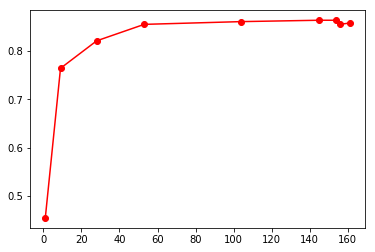

In [91]:
plt.plot(variables,accuracy,'ro-')

In [92]:
variables=[]
accuracy=[]
for c in [0.00001,0.0001,0.001,0.01,0.1,1.2,4,8,16]:
    model = LogisticRegression(penalty='l2',C=c)
    model.fit(df.iloc[0:1800,1:df.shape[1]-1], df.iloc[0:1800,df.shape[1]-1]) 
    score=model.score(df.iloc[1800:,1:df.shape[1]-1], df.iloc[1800:,df.shape[1]-1])
    accuracy.append(score)
    variables.append(np.count_nonzero(model.coef_))

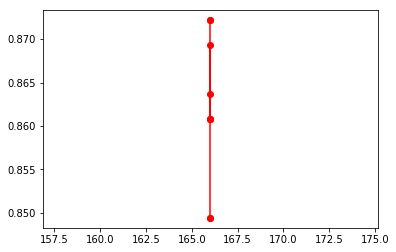

In [93]:
plt.plot(variables,accuracy,'ro-')

In [97]:
def logistic(df,method,reg):
    
    kf = KFold(n_splits=3, random_state=0)
    
    result = []
    
    for train, test in kf.split(df):
        
        train_data = df.iloc[train,:]
        test_data =  df.iloc[test,:]

        trainx = train_data.iloc[:,1:(train_data.shape[1]-1)]
        trainy = train_data.iloc[:,(train_data.shape[1]-1)]

        testx = test_data.iloc[:,1:test_data.shape[1]-1]
        testy = test_data.iloc[:,test_data.shape[1]-1]
        
        model = LogisticRegression(penalty=method,C=reg)
        model.fit(trainx, trainy) 
        result.append([model.score(testx, testy),np.count_nonzero(model.coef_)])
        
    return result

In [101]:
accuracy=[]
variables=[]
for strength in [0.00001,0.0001,0.001,0.01,0.1,1,2,4,8,16]:
    res = logistic(df,method='l1',reg=strength)
    accuracy.append(np.average([x[0] for x in res]))
    variables.append(int(np.average([x[1] for x in res])))

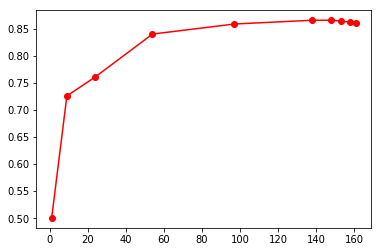

In [102]:
plt.plot(variables,accuracy,'ro-')

In [55]:
for strength in [0.00001,0.0001,0.001,0.01,0.1,1]:
    print(logistic(df,method='l2',reg=strength))

0.7857943898607761
0.8132060102899604
0.8443374785841656
0.851772641862501
0.8536283570898552
0.8499143366627427


In [56]:
df.iloc[0:1800,1:df.shape[1]-1]

,age,urea_n_min,urea_n_max,urea_n_mean,resprate_min,resprate_max,resprate_mean,glucose_min,glucose_max,glucose_mean,...,apsiii,oasis,lods,gender_F,gender_M,marital_status_DIVORCED,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_WIDOWED
0,58.831224,16.0,37.0,26.111111,10.0,52,20.104478,67.0,405.0,150.159420,...,52.5,36.5,5.5,0,1,0,1,0,0,0
1,81.618606,10.0,15.0,13.500000,11.0,31,18.704225,119.0,348.0,170.562500,...,39.0,48.0,4.0,0,1,0,1,0,0,0
2,79.102744,16.0,56.0,35.500000,20.0,31,25.744681,90.0,188.0,127.900000,...,53.0,35.0,6.0,1,0,1,0,0,0,0
3,88.232043,8.0,27.0,17.692308,10.0,51,17.770833,92.0,271.0,190.444444,...,49.5,40.5,4.0,1,0,0,0,0,1,0
4,90.000000,38.0,48.0,42.250000,4.0,40,26.360000,62.0,135.0,94.375000,...,54.0,35.0,5.0,1,0,0,0,0,1,0
5,71.745472,64.0,129.0,95.111111,11.0,28,17.206186,89.0,174.0,108.571429,...,53.0,27.0,5.0,1,0,0,0,0,1,0
6,58.503099,5.0,24.0,10.615385,9.0,26,14.819113,51.0,275.0,137.831897,...,29.0,31.0,3.0,0,1,0,1,0,0,0
7,90.000000,49.0,68.0,57.692308,8.0,34,17.644068,63.0,238.0,140.320000,...,57.0,45.0,8.0,0,1,0,0,0,0,1
8,42.664141,3.0,3.0,3.000000,13.0,28,19.851852,77.0,136.0,91.750000,...,31.0,37.0,4.0,1,0,0,0,0,1,0
9,71.994728,4.0,24.0,13.478261,12.0,31,23.158537,148.0,270.0,185.000000,...,63.0,30.0,6.0,1,0,0,1,0,0,0


In [77]:
np.sort(model.coef_)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000